In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
data =pd.read_csv('monthly_agg_sales.csv')
data.head()
# train test split
train = data.head(42)
test = data.tail(6)
# Stationarity check
result = adfuller(train.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.288990
p-value: 0.000006


In [3]:
train.set_index('month',inplace = True)
test.set_index('month',inplace = True)
# create lag variables
train['lag1'] = train['Sales'].shift(1)
# check stationarty for lag
result = adfuller(train.lag1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.238521
p-value: 0.000007


<ipython-input-3-1fc42f26dc5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lag1'] = train['Sales'].shift(1)


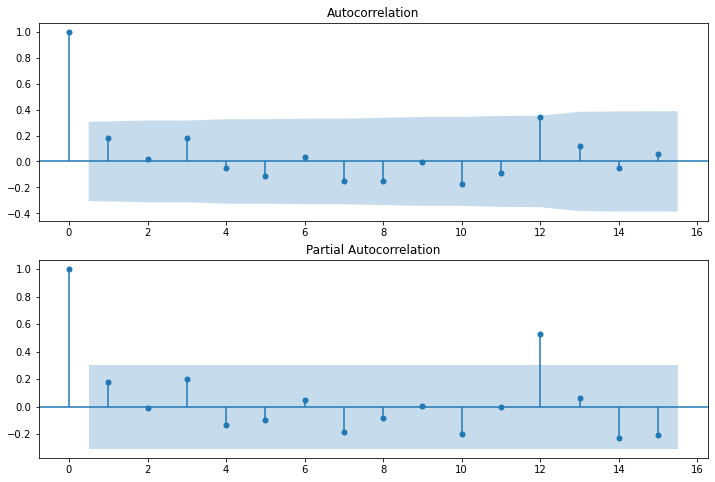

In [4]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['lag1'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['lag1'].dropna(),lags=15,ax=ax2)

In [8]:
model = ARIMA(train.Sales, order=(1,0,1))
model_fit = model.fit()
#print(model_fit.summary())

predictions = model_fit.forecast(6)
print(predictions)

2017-07-01    13990.365374
2017-08-01    13142.916794
2017-09-01    13469.497506
2017-10-01    13343.643308
2017-11-01    13392.143659
2017-12-01    13373.453110
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [9]:
train['lag2'] = train['Sales'].shift(2)
# check stationarty for lag
result = adfuller(train.lag1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.238521
p-value: 0.000007


<ipython-input-9-4641352b777e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lag2'] = train['Sales'].shift(2)


In [11]:
train['lag3'] = train['Sales'].shift(3)
# check stationarty for lag
result = adfuller(train.lag1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.238521
p-value: 0.000007


<ipython-input-11-c8ef0b556aaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lag3'] = train['Sales'].shift(3)


In [23]:
train['lag4'] = train['Sales'].shift(4)
# check stationarty for lag
result = adfuller(train.lag1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.238521
p-value: 0.000007


<ipython-input-23-b25dbbfe7ed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lag4'] = train['Sales'].shift(4)


In [24]:
train

,Sales,lag1,lag2,lag3,lag4
month,,,,,
1/1/2014,4851.080,NaN,NaN,NaN,NaN
2/1/2014,1071.724,4851.080,NaN,NaN,NaN
3/1/2014,8605.879,1071.724,4851.080,NaN,NaN
4/1/2014,11155.074,8605.879,1071.724,4851.080,NaN
5/1/2014,7135.624,11155.074,8605.879,1071.724,4851.080
6/1/2014,12953.037,7135.624,11155.074,8605.879,1071.724
7/1/2014,15121.208,12953.037,7135.624,11155.074,8605.879
8/1/2014,11379.462,15121.208,12953.037,7135.624,11155.074
9/1/2014,27423.298,11379.462,15121.208,12953.037,7135.624


In [15]:
model = ARIMA(train.Sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(6)
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values -test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales -predictions.values)/test.Sales )*100:.3f}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.654
Date:                Wed, 01 Feb 2023   AIC                            855.308
Time:                        17:59:32   BIC                            860.449
Sample:                    01-01-2014   HQIC                           857.180
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1352      0.313      0.431      0.666      -0.479       0.749
ma.L1         -0.8704      0.123     -7.065      0.000      -1.112      -0.629
sigma2       6.85e+07   2.74e-10    2.5e+17      0.0

C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
model = ARIMA(train.Sales, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(6)
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values -test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales -predictions.values)/test.Sales )*100:.3f}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -432.026
Date:                Wed, 01 Feb 2023   AIC                            872.052
Time:                        18:00:33   BIC                            879.002
Sample:                    01-01-2014   HQIC                           874.599
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.338e+04   1263.077     10.592      0.000    1.09e+04    1.59e+04
ar.L1         -0.3854      0.639     -0.603      0.546      -1.637       0.866
ma.L1          0.5766      0.524      1.101      0.2

C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [17]:
model = ARIMA(train.Sales, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(6)
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values -test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales -predictions.values)/test.Sales )*100:.3f}')

C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -431.239
Date:                Wed, 01 Feb 2023   AIC                            874.479
Time:                        18:00:42   BIC                            884.905
Sample:                    01-01-2014   HQIC                           878.300
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.338e+04   1993.123      6.712      0.000    9472.203    1.73e+04
ar.L1         -1.2207      0.218     -5.602      0.000      -1.648      -0.794
ar.L2         -0.8448      0.181     -4.667      0.0

In [18]:
model = ARIMA(train.Sales, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(6)
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values -test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales -predictions.values)/test.Sales )*100:.3f}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -424.349
Date:                Wed, 01 Feb 2023   AIC                            856.697
Time:                        18:00:50   BIC                            863.551
Sample:                    01-01-2014   HQIC                           859.193
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1410      0.370      0.381      0.703      -0.583       0.865
ar.L2          0.0122      0.264      0.046      0.963      -0.505       0.530
ma.L1         -0.8798      0.235     -3.740      0.0

C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
model = ARIMA(train.Sales, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(6)
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values -test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales -predictions.values)/test.Sales )*100:.3f}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -424.098
Date:                Wed, 01 Feb 2023   AIC                            858.196
Time:                        18:01:10   BIC                            866.763
Sample:                    01-01-2014   HQIC                           861.316
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4564      1.314     -0.347      0.728      -3.031       2.118
ar.L2         -0.0187      0.513     -0.037      0.971      -1.024       0.987
ma.L1         -0.2617      1.267     -0.207      0.8

C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
model = ARIMA(train.Sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(6)
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values -test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales -predictions.values)/test.Sales )*100:.3f}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.654
Date:                Thu, 02 Feb 2023   AIC                            855.308
Time:                        10:14:28   BIC                            860.449
Sample:                    01-01-2014   HQIC                           857.180
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1352      0.313      0.431      0.666      -0.479       0.749
ma.L1         -0.8704      0.123     -7.065      0.000      -1.112      -0.629
sigma2       6.85e+07   2.74e-10    2.5e+17      0.0

C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
